In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neural_network import MLPClassifier

In [10]:
X = [[0,0], [1,1]]
y = [0, 1]
perceptron = Perceptron(max_iter=10, eta0=0.1)
perceptron.fit(X, y)
accuracy = accuracy_score(y, perceptron.predict(X))
class_biases = perceptron.intercept_
class_weights = perceptron.coef_

print(f"- Accuracy: {accuracy:.2f}")
print(f"Bias (w_0): {class_biases}")
print(f"Weights (w_1, w_2): {class_weights}")
print()

- Accuracy: 1.00
Bias (w_0): [-0.1]
Weights (w_1, w_2): [[0.1 0.1]]



In [4]:
iris = load_iris(as_frame=True).frame

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

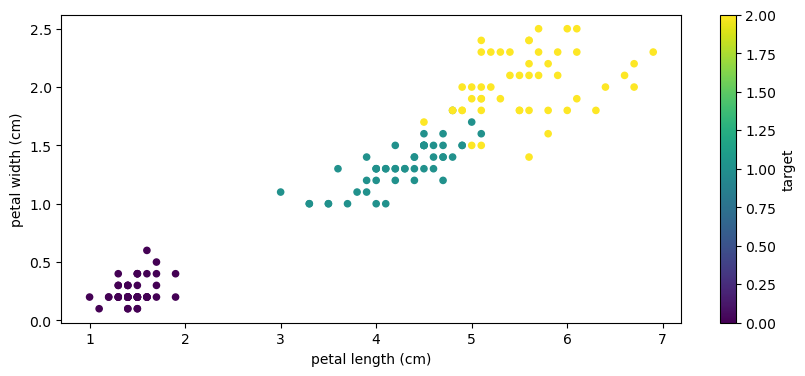

In [5]:
pd.concat([iris[iris.columns[:-1]], iris['target']], axis=1).plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target',colormap='viridis', figsize=(10,4))

In [6]:
X = iris.drop('target', axis=1)
y = iris['target']
X = X[['petal length (cm)', 'petal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
results = []
accuracy_list_of_tuples = []
weight_list_of_tuples = []
for species in range(3):
    perceptron = Perceptron(max_iter=100, eta0=0.1)  # Example parameters
    perceptron.fit(X_train, (y_train == species).astype(int))

    train_accuracy = accuracy_score((y_train == species).astype(int), perceptron.predict(X_train))
    test_accuracy = accuracy_score((y_test == species).astype(int), perceptron.predict(X_test))
    class_biases = perceptron.intercept_
    class_weights = perceptron.coef_
    print(class_weights[0][0])
    results.append((train_accuracy, test_accuracy, class_biases, class_weights))
    accuracy_list_of_tuples.append((train_accuracy, test_accuracy))
    weight_list_of_tuples.append((class_biases[0], class_weights[0][0], class_weights[0][1]))

for species in range(3):
    print(f"Accuracy for species {species}:")
    print(f"- Training set: {results[species][0]:.2f}")
    print(f"- Test set: {results[species][1]:.2f}")
    print(f"Bias (w_0): {results[species][2]}")
    print(f"Weights (w_1, w_2): {results[species][3]}")
    print()

print(accuracy_list_of_tuples)
print(weight_list_of_tuples)

-0.14999999999999983
0.6800000000000009
0.18999999999999811
Accuracy for species 0:
- Training set: 1.00
- Test set: 1.00
Bias (w_0): [0.4]
Weights (w_1, w_2): [[-0.15 -0.17]]

Accuracy for species 1:
- Training set: 0.64
- Test set: 0.70
Bias (w_0): [-0.9]
Weights (w_1, w_2): [[ 0.68 -1.61]]

Accuracy for species 2:
- Training set: 0.85
- Test set: 0.87
Bias (w_0): [-3.7]
Weights (w_1, w_2): [[0.19 2.15]]

[(1.0, 1.0), (0.6416666666666667, 0.7), (0.85, 0.8666666666666667)]
[(0.4, -0.14999999999999983, -0.16999999999999996), (-0.8999999999999999, 0.6800000000000009, -1.6099999999999979), (-3.700000000000002, 0.18999999999999811, 2.150000000000001)]


In [8]:
with open('per_acc.pkl', 'wb') as file:
    pickle.dump(accuracy_list_of_tuples, file)

with open('per_wght.pkl', 'wb') as file:
    pickle.dump(weight_list_of_tuples, file)

In [9]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [10]:
perceptron = Perceptron(max_iter=100, eta0=0.1)
perceptron.fit(X, y)
accuracy = accuracy_score(y, perceptron.predict(X))
class_biases = perceptron.intercept_
class_weights = perceptron.coef_

print(f"- Accuracy: {accuracy:.2f}")
print(f"Bias (w_0): {class_biases}")
print(f"Weights (w_1, w_2): {class_weights}")
print()

- Accuracy: 0.50
Bias (w_0): [0.]
Weights (w_1, w_2): [[0. 0.]]



In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', learning_rate='constant', activation='logistic', max_iter=1000)

average = 0

for _ in range(100):
    mlp.fit(X, y)
    average += mlp.score(X, y)
    
average /= 100

print(average)
print(mlp.intercepts_)
print(mlp.coefs_)

0.795
[array([-7.96513567,  8.65433093]), array([-0.79379308])]
[array([[ 9.48568122,  1.28640726],
       [-9.58884749,  2.2420145 ]]), array([[8.89826241],
       [0.1008335 ]])]


In [55]:
with open('mlp_xor.pkl', 'wb') as file:
    pickle.dump(mlp, file)

In [56]:
mlp.intercepts_ = [np.array([-1.5, 0.5]), np.array([-0.5])]
mlp.coefs_ = [np.array([[1.0, 1.0], [1.0, 1.0]]), np.array([[-1.0], [1.0]])]
print(mlp.predict(X))
print(mlp.score(X, y))

[0 0 0 0]
0.5


In [57]:
with open('mlp_xor_fixed.pkl', 'wb') as file:
    pickle.dump(mlp, file)